In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# 2. Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
from PIL import Image,ImageEnhance
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import figure


In [12]:
def createmask(Img):                               #the image is accepted in BGR format
    l = Img.shape[0]
    b = Img.shape[1]
    sumb = np.sum(Img[:,:,0])
    x = (sumb/(l*b))
    new = 255 * np.ones((l,b),np.uint8)
    for i in range(l):
        for j in range(b):
            if Img[i][j][0] > (1.5*x):  
                new[i][j] = 0
    #cv2_imshow(new)
    return new

In [13]:
img = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_0244.JPG")
mask = createmask(img)
#createmask(img)


In [ ]:
img = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_6139.JPG")
mask1 = createmask(img)
#createmask(img)


#**RGB** 

In [ ]:
img = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_0244.JPG")
histr = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([-1,275])
plt.xlabel("Blue intensity value")
plt.ylabel("No. of Pixels")
plt.savefig("drive/My Drive/histograms/histograms of 0244/Blue0244.JPG")
#plt.show()

In [ ]:
img = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_6176.JPG")
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([-1,275])
plt.xlabel("intensity value")
plt.ylabel("No. of Pixels")
plt.savefig("drive/My Drive/histograms/histograms of 6176/R-G-B combined for reference.JPG")

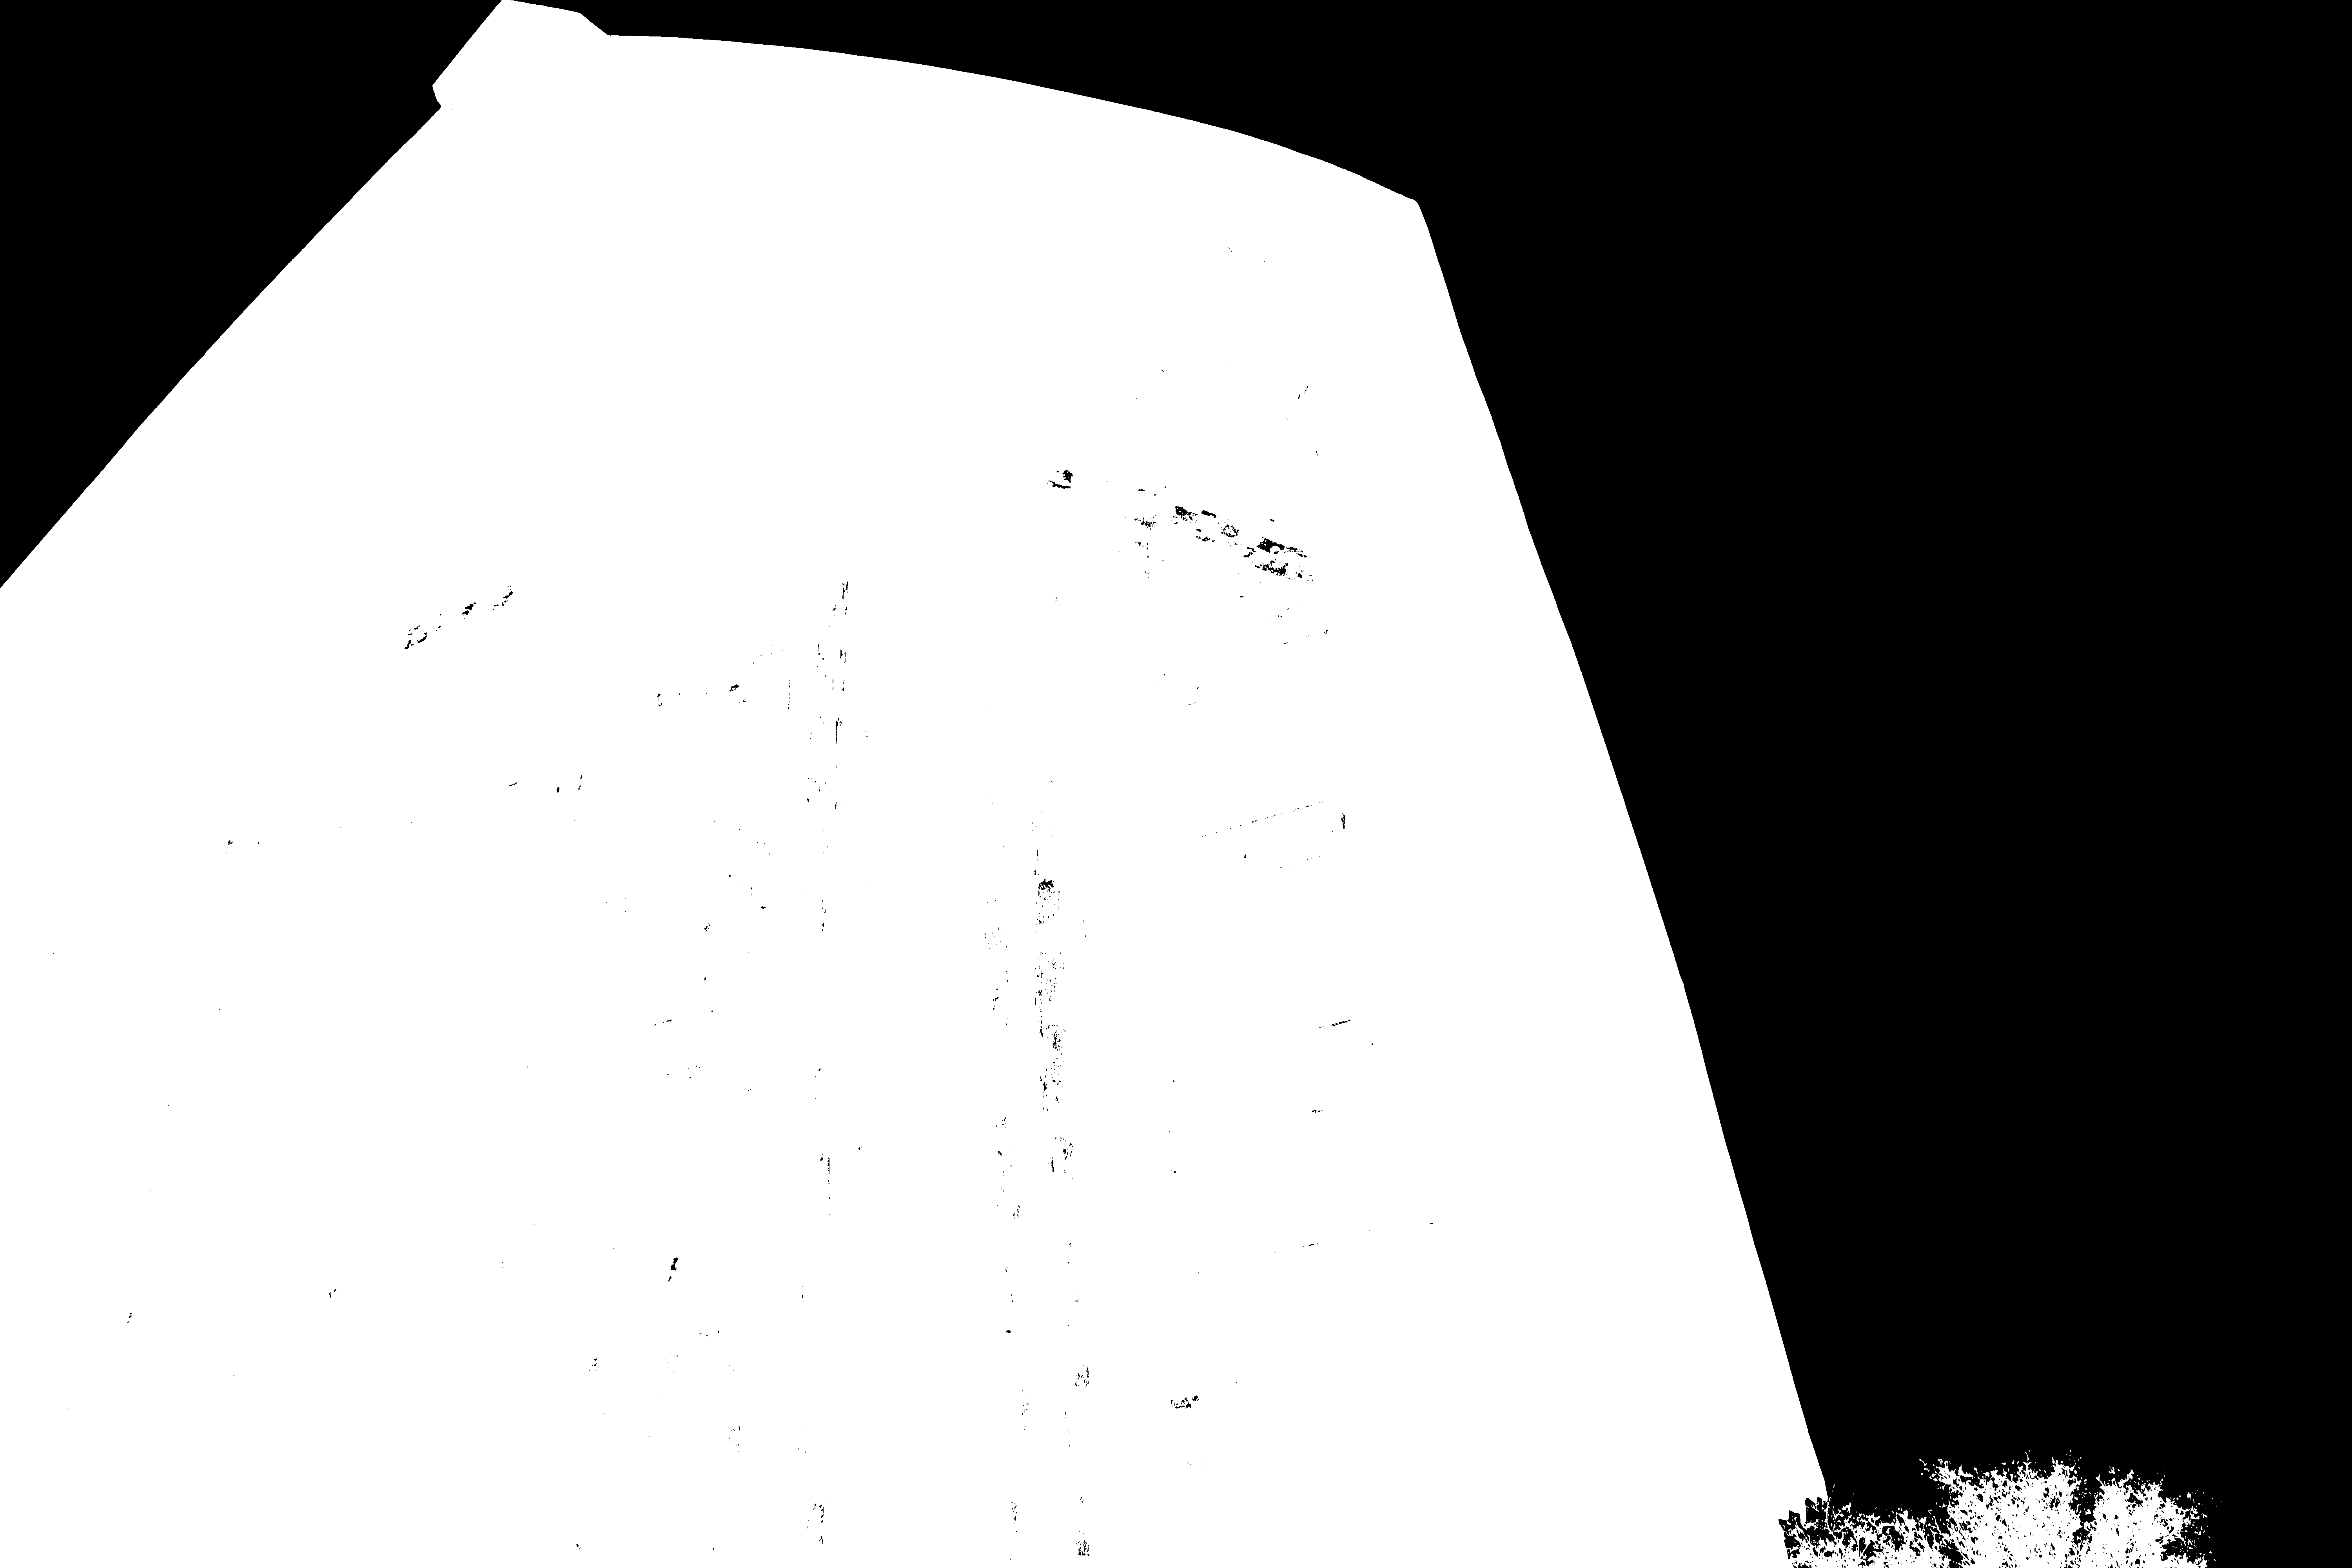

In [14]:
cv2_imshow(mask)

#**RGB END**

#**HSV**

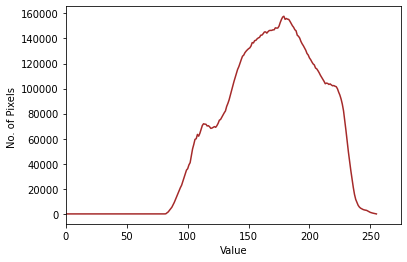

In [ ]:
img = cv2.imread("drive/My Drive/YCB_CR Histogram Matching Results/0244.JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
histr = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(histr,color = 'brown')
plt.xlim([0,275])
plt.xlabel("Value")
plt.ylabel("No. of Pixels ")
plt.savefig("drive/My Drive/histograms/histograms of 0244/result3/Value0244.JPG")
#plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


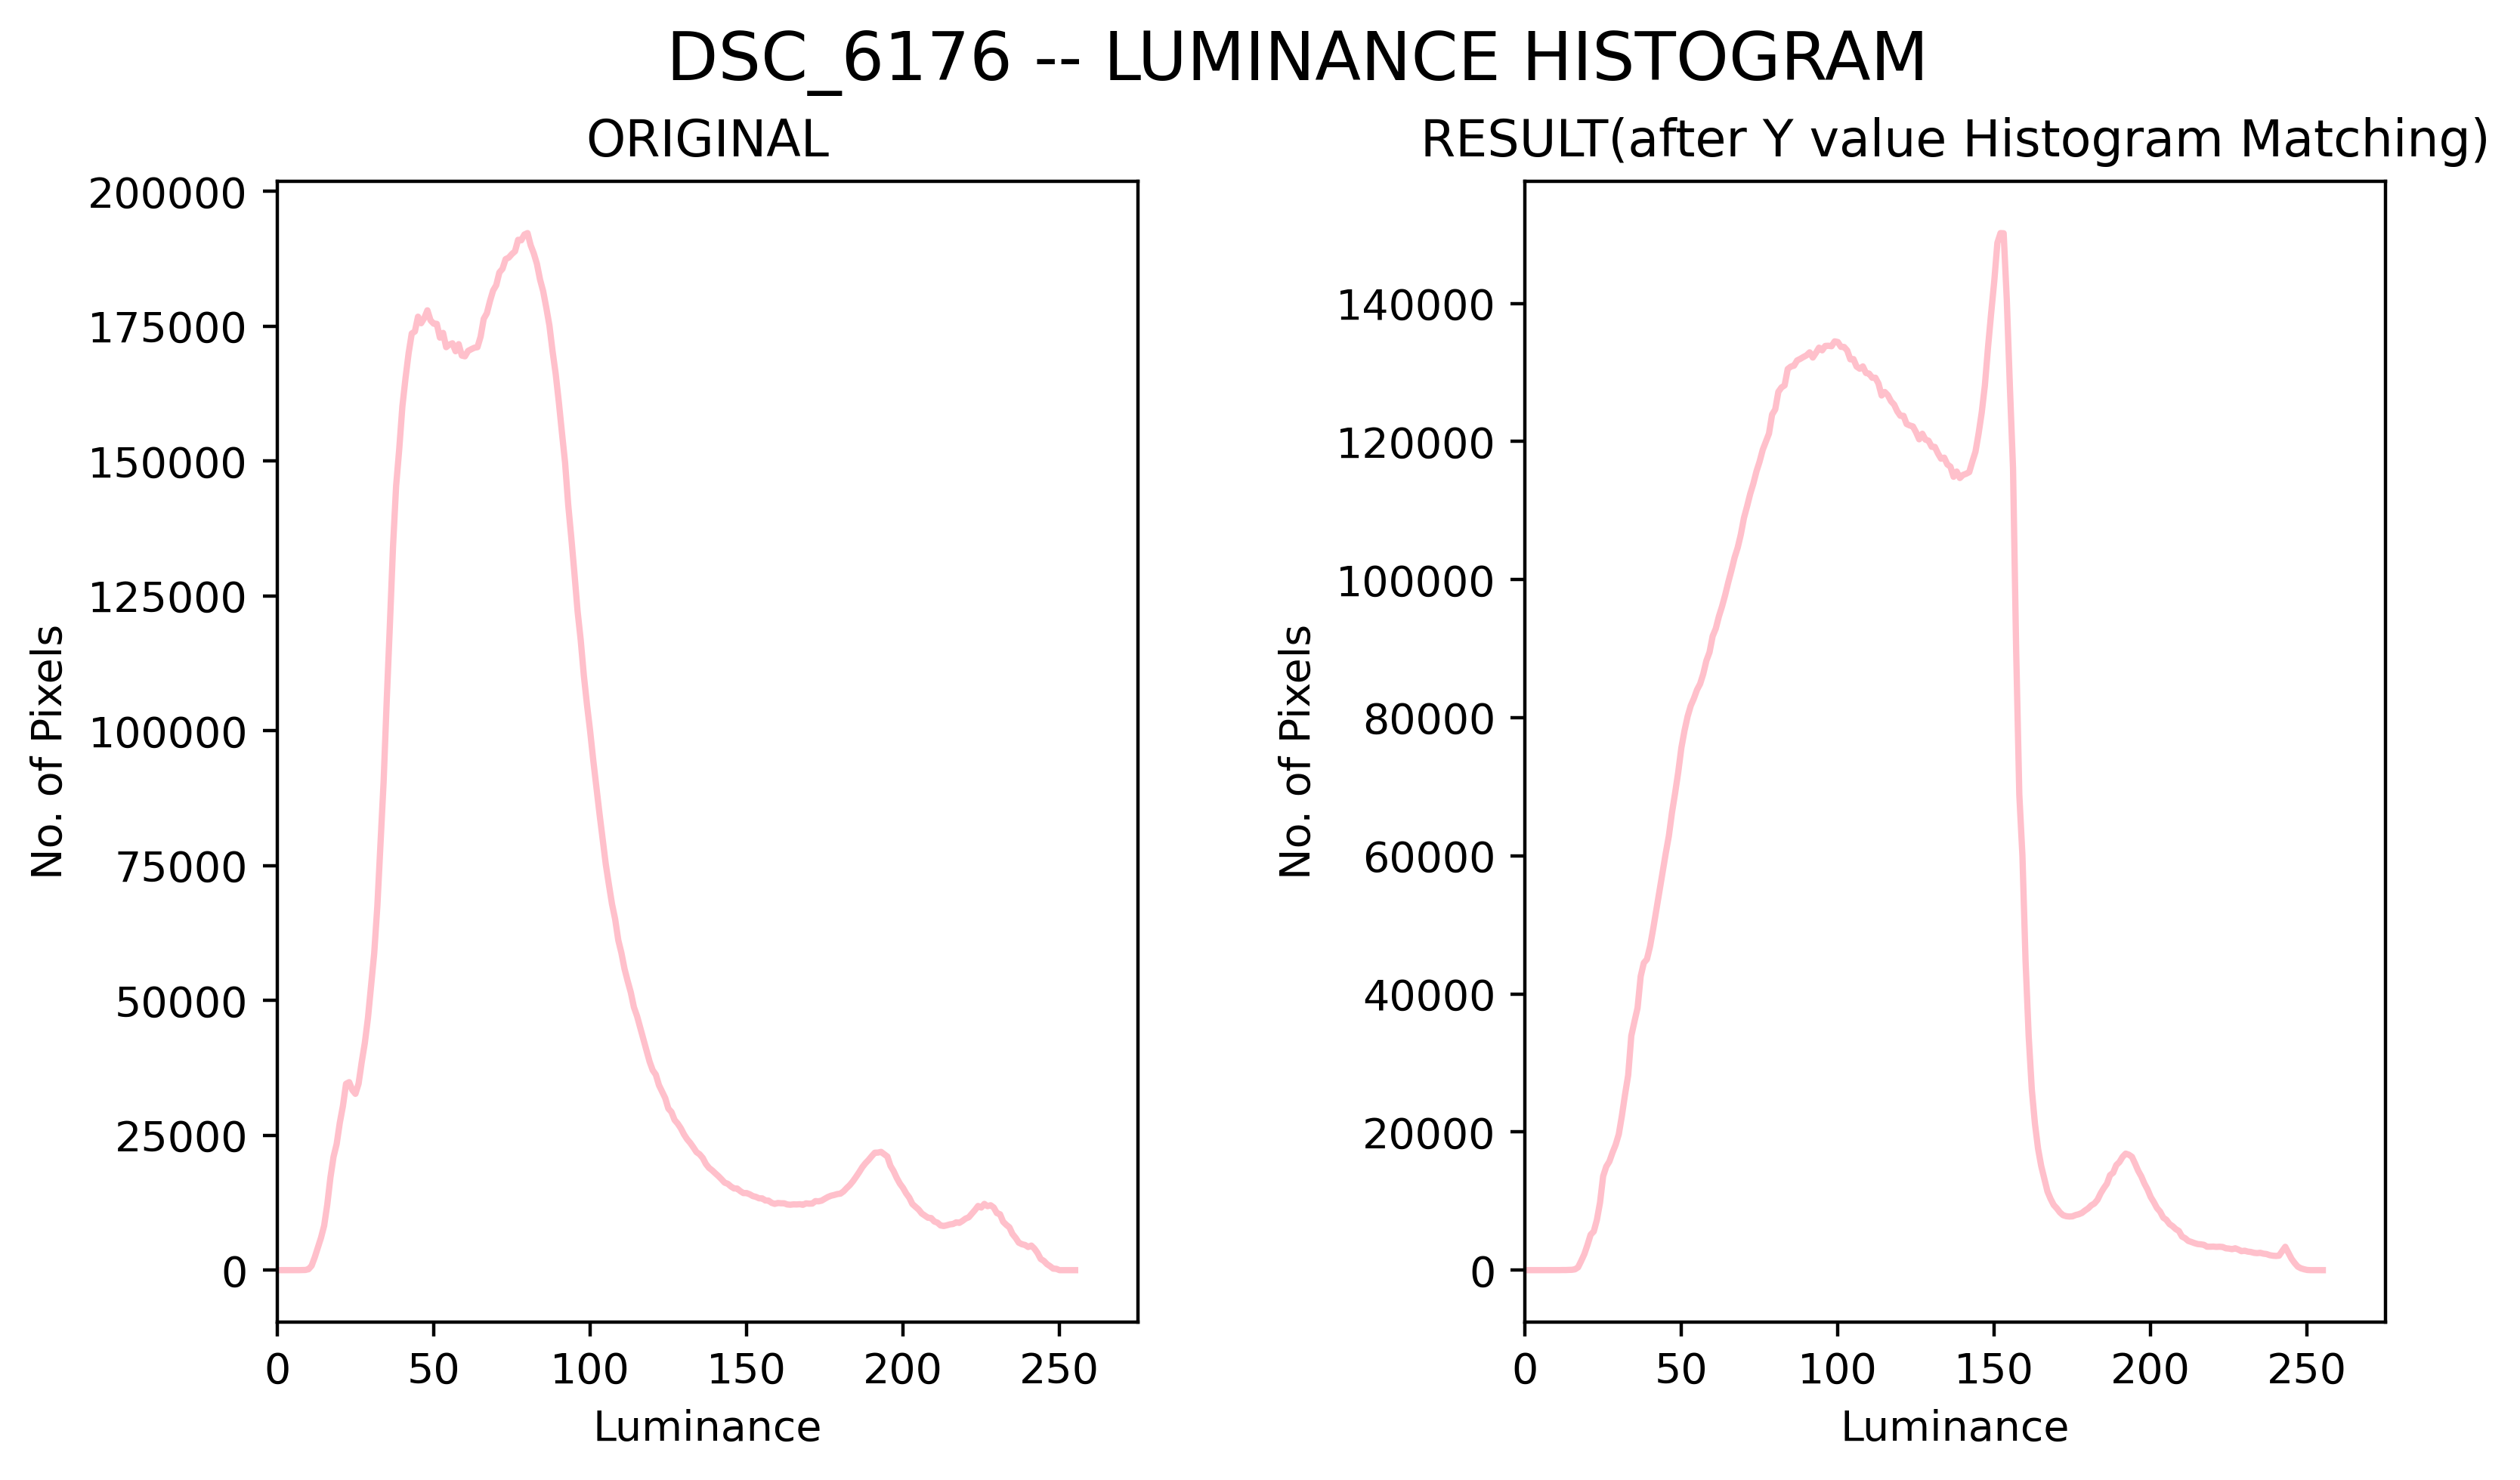

In [ ]:
img1 = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_6176.JPG")
img2 = cv2.imread("drive/My Drive/Y Histogram_Match RESULTS/Y6176.JPG")
img1f = cv2.cvtColor(img1,cv2.COLOR_BGR2YCR_CB)
img2f = cv2.cvtColor(img2,cv2.COLOR_BGR2YCR_CB)
histr1 = cv2.calcHist([img1f],[0],mask,[256],[0,255])
histr2 = cv2.calcHist([img2f],[0],mask,[256],[0,255])
f = figure(num=None, figsize=(9, 5), dpi=400, facecolor='w', edgecolor='k')
plt.subplot(1 ,2 , 1)
plt.plot(histr1,color = 'pink')
plt.xlim([0,275])
plt.xlabel("Luminance")
plt.ylabel("No. of Pixels")

plt.subplot(1 ,2 , 2)
plt.plot(histr2,color = 'pink')
plt.xlim([0,275])
plt.xlabel("Luminance")
plt.ylabel("No. of Pixels")

a1 = f.add_subplot(121)
a2 = f.add_subplot(122)
f.suptitle("DSC_6176 -- LUMINANCE HISTOGRAM", fontsize=16)
a1.title.set_text('ORIGINAL')
a2.title.set_text('RESULT(after Y value Histogram Matching)')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=None)
plt.savefig("drive/My Drive/histograms Y Matching/Luminance6176.JPG",dpi = 400)
#plt.savefig("drive/My Drive/histograms/histograms of 0244/result3/Luminance0244.JPG")
#plt.show()

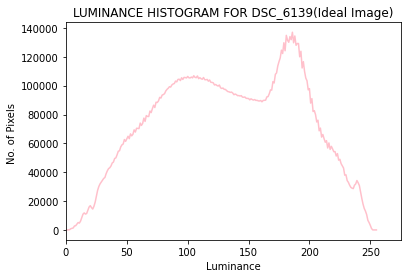

In [ ]:
 img1 = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_0244.JPG")
img2 = cv2.imread("drive/My Drive/Y Histogram_Match RESULTS/Y0244.JPG")
img3 = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_6139.JPG")
img1f = cv2.cvtColor(img1,cv2.COLOR_BGR2YCR_CB)
img2f = cv2.cvtColor(img2,cv2.COLOR_BGR2YCR_CB)
img3f = cv2.cvtColor(img3,cv2.COLOR_BGR2YCR_CB)
histr1 = cv2.calcHist([img1f],[0],mask,[256],[0,255])
histr2 = cv2.calcHist([img2f],[0],mask,[256],[0,255])
histr3 = cv2.calcHist([img3f],[0],mask1,[256],[0,255])
plt.title("LUMINANCE HISTOGRAM FOR DSC_6139(Ideal Image)")
plt.plot(histr3,color = 'pink')
plt.xlim([0,275])
plt.xlabel("Luminance")
plt.ylabel("No. of Pixels ")
plt.savefig("drive/My Drive/histograms/histograms of 0244/result3/Value0244.JPG")
plt.savefig("drive/My Drive/histograms Y Matching/Luminance6139.JPG",dpi = 400)
# plt.subplot(1 ,3 , 1)
# plt.plot(histr1,color = 'pink')
# plt.xlim([0,275])
# plt.xlabel("Luminance")
# plt.ylabel("No. of Pixels")

# plt.subplot(1 ,3 , 2)
# plt.plot(histr3,color = 'pink')
# plt.xlim([0,275])
# plt.xlabel("Luminance")
# plt.ylabel("No. of Pixels")
# #plt.savefig("drive/My Drive/histograms/histograms of 0244/result3/Luminance0244.JPG")
# plt.show()


# plt.subplot(1 ,3 , 3)
# plt.plot(histr2,color = 'pink')
# plt.xlim([0,275])
# plt.xlabel("Luminance")
# plt.ylabel("No. of Pixels")
# plt.savefig("drive/My Drive/histograms Y Matching/Luminance0244**.JPG",dpi=400)
#plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


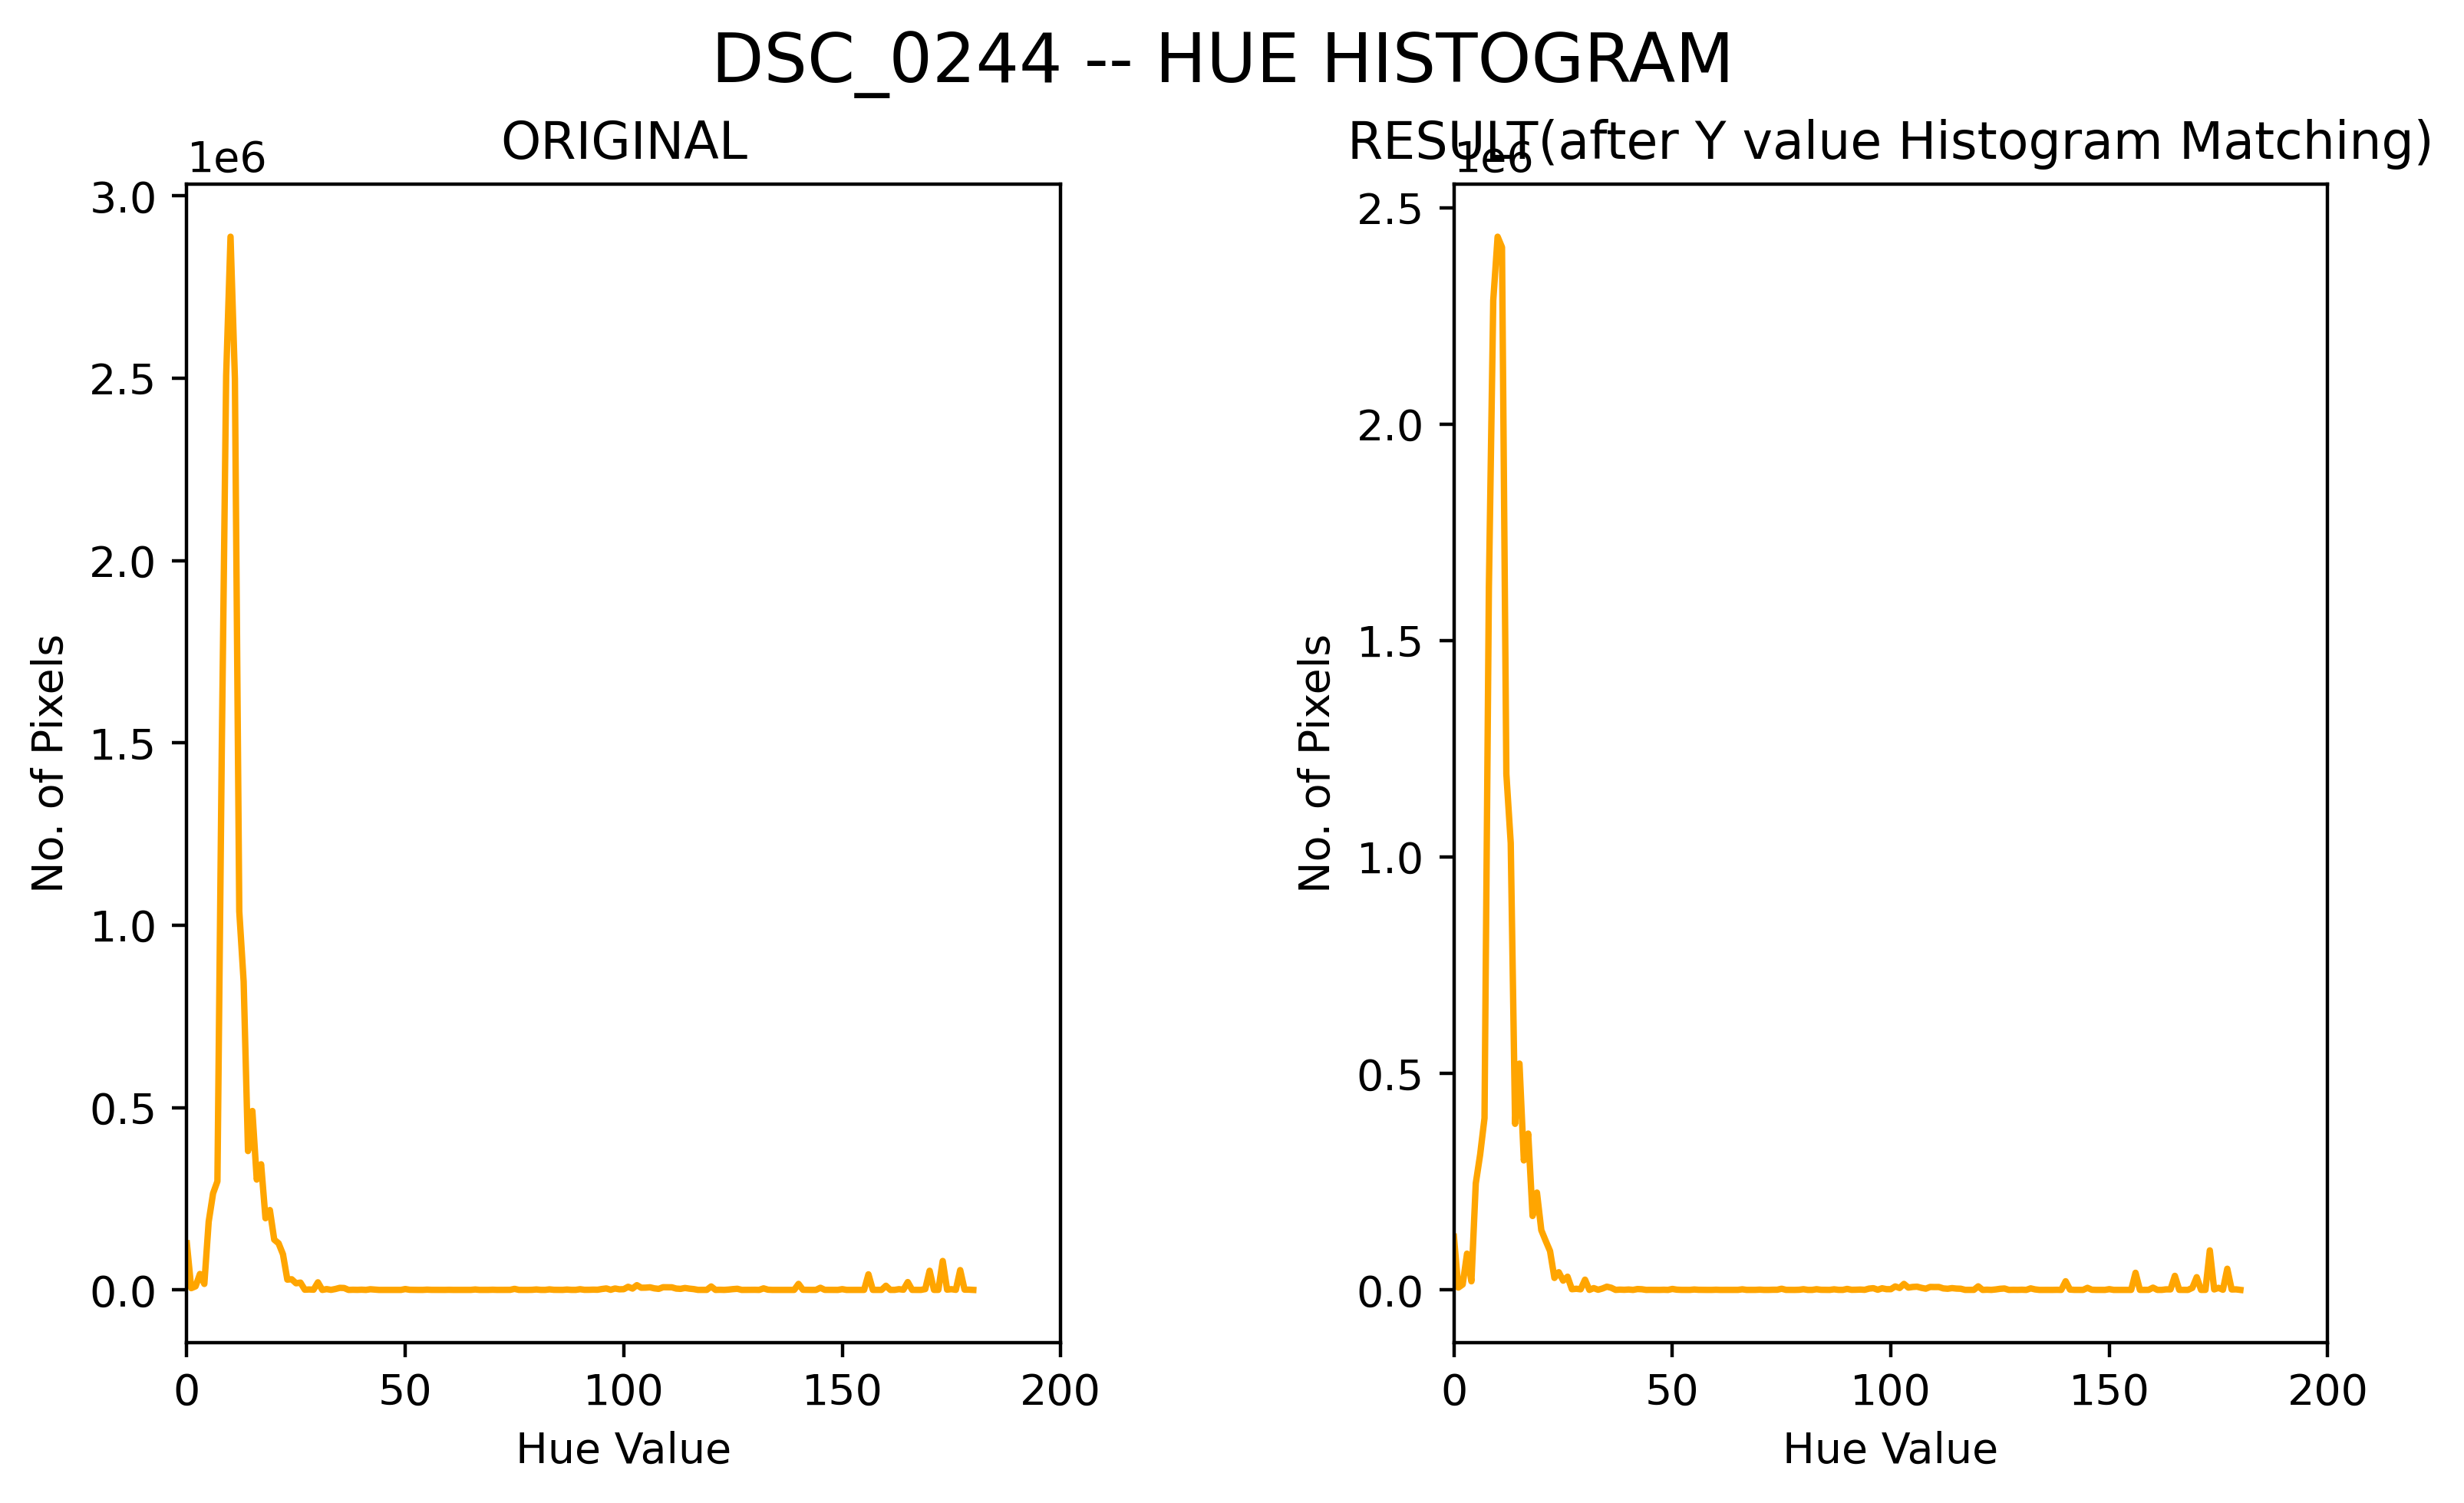

In [18]:
img1 = cv2.imread("drive/My Drive/Images_for_Adarsh/DSC_0244.JPG")
img2 = cv2.imread("drive/My Drive/Y Histogram_Match RESULTS/Y0244.JPG")
img1f = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
img2f = cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
histr1 = cv2.calcHist([img1f],[0],mask,[181],[0,180])
histr2 = cv2.calcHist([img2f],[0],mask,[181],[0,180])
f = figure(num=None, figsize=(9, 5), dpi=400, facecolor='w', edgecolor='k')
plt.subplot(1 ,2 , 1)
plt.plot(histr1,color = 'orange')
plt.xlim([0,200])
plt.xlabel("Hue Value")
plt.ylabel("No. of Pixels")

plt.subplot(1 ,2 , 2)
plt.plot(histr2,color = 'orange')
plt.xlim([0,200])
plt.xlabel("Hue Value")
plt.ylabel("No. of Pixels")

a1 = f.add_subplot(121)
a2 = f.add_subplot(122)
f.suptitle("DSC_0244 -- HUE HISTOGRAM", fontsize=16)
a1.title.set_text('ORIGINAL')
a2.title.set_text('RESULT(after Y value Histogram Matching)')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=None)
plt.savefig("drive/My Drive/histograms Y Matching/HSV Histogram/Hue0244.JPG",dpi = 400)
#plt.savefig("drive/My Drive/histograms/histograms of 0244/result3/Luminance0244.JPG")
#plt.show()